<a href="https://colab.research.google.com/github/Hamzarafique100/Machine-Learning-Projects-Examples/blob/master/TF2_0_Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('/content/sample_data/SMSSpamCollection',sep='\t',
                           names=["labels", "message"] )

In [5]:
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [8]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['message'], Y, test_size=0.33)

In [11]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [12]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7135 unique tokens.


In [13]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [14]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [15]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [16]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 15ms/step - loss: 0.5041 - accuracy: 0.8411 - val_loss: 0.3990 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 1s 12ms/step - loss: 0.3899 - accuracy: 0.8674 - val_loss: 0.3958 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 1s 12ms/step - loss: 0.3837 - accuracy: 0.8674 - val_loss: 0.3854 - val_accuracy: 0.8630
Epoch 4/10
117/117 [==============================] - 1s 12ms/step - loss: 0.3419 - accuracy: 0.8674 - val_loss: 0.2835 - val_accuracy: 0.8630
Epoch 5/10
117/117 [==============================] - 1s 12ms/step - loss: 0.2325 - accuracy: 0.8674 - val_loss: 0.1939 - val_accuracy: 0.8630
Epoch 6/10
117/117 [==============================] - 1s 12ms/step - loss: 0.1544 - accuracy: 0.9561 - val_loss: 0.1346 - val_accuracy: 0.9755
Epoch 7/10
117/117 [==============================] - 1s 13ms/step - loss: 0.1005 - accuracy: 0.9882 - val_loss: 0.0999 - va

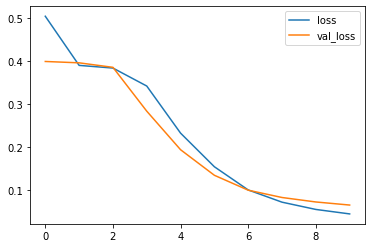

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

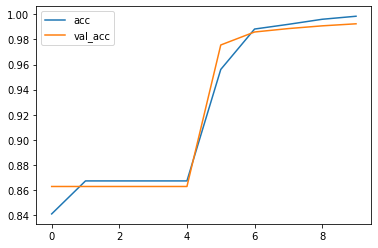

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()